<a href="https://colab.research.google.com/github/saniya1027108/Fraud-Detection-using-Machine-Learning/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/PROJECTS/Fraud Detection ML/Fraud.csv')

In [ ]:
dataset.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
dataset.shape

(6362620, 11)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
dataset.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

The columns '**nameOrig**' and '**nameDest**' are columns that do not contain any numerical data and hence do not affect our target variable. Hence we can drop those columns.

In [ ]:
#dropping unnecessary columns
dataset.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

In [ ]:
#renaming one column
dataset.rename(columns={'newbalanceOrig':'newbalanceOrg'}, inplace = True)

The provided data has the financial transaction data as well as the target variable **isFraud**, which is the actual fraud status of the transaction and **isFlaggedFraud** is the indicator which the simulation is used to flag the transaction using some threshold value.

In [ ]:
print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
dataset[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].min()

Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [ ]:
print('Maximum value of Amount, Old/New Balance of Origin/Destination:')
dataset[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].max()

Maximum value of Amount, Old/New Balance of Origin/Destination:


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrg     4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

#  Data analysis


Since there is no missing and garbage value, there is no need for data cleaning, but we still need to perform data analysis as data contains huge variation of the value in different columns. Normalization will also imporve the overall accuracy of the machine learning model.

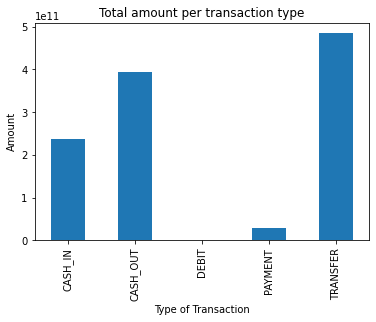

In [ ]:
var = dataset.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [ ]:
dataset.loc[dataset.isFraud==1].type.unique()  #isFraud is the transaction made by the fraudulent agents inside the simulation


array(['TRANSFER', 'CASH_OUT'], dtype=object)

The graph above shows that **TRANSFER** and **CASH_OUT** are two most used mode of transaction and we can see that TRANSFER and CASH_OUT are also the only way in which the fraud can happen. Thus we will focus on this type of transactions.

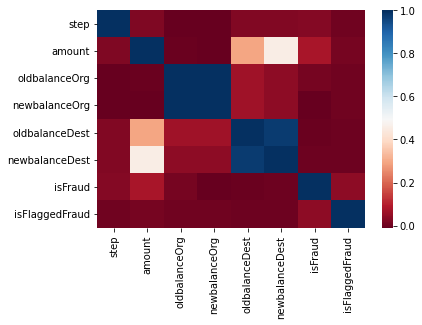

In [ ]:
sns.heatmap(dataset.corr(), cmap='RdBu');

*Things we can conclude from this heatmap*:

1. *OldbalanceOrg* and *NewbalanceOrg* are highly correlated.
2. *OldbalanceDest* and *NewbalanceDest* are highly correlated.
3. Amount is correlated with isFraud(Target Variable).

There is not much relation between the features, so we need to understand where the relationship between them depends on the type of transaction and amount. To do so, we need to see the heat map of fraud and nonfraud transactions differently.

In [ ]:
fraud = dataset.loc[dataset.isFraud == 1]
nonfraud = dataset.loc[dataset.isFraud == 0]

In [ ]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()    

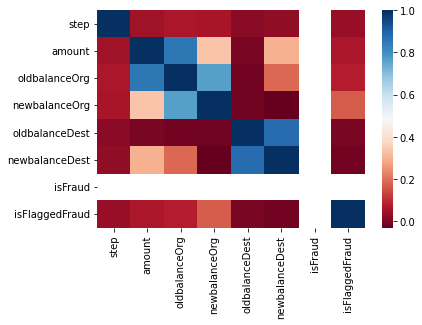

In [ ]:
sns.heatmap(fraud.corr(), cmap='RdBu');

The two Feautures that stand out are **isFraud** and **isFlaggedFraud** column. From the hypothesis:
 

*   isFraud is the indicator which indicates the actual fraud transactions
*   isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered

From the above heatmap we can see that there is some relation between other columns and isFlaggedFraud thus there must be a relation between isFraud.





In [ ]:
print('The total number of fraud transaction is {}.'.format(dataset.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(dataset.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


Thus in every 733 transactions there is 1 Fraudulent Transaction

In [ ]:
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Amount lost due to these fraud transaction is $12056415427.


In [ ]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

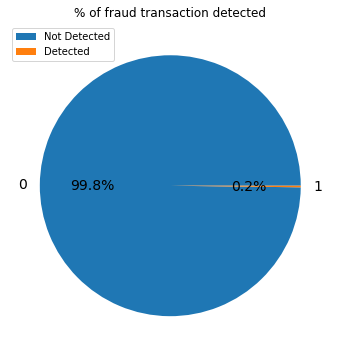

In [ ]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

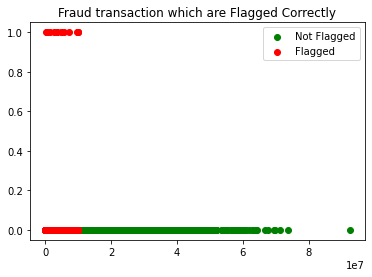

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

The plot above clearly shows the need for a system which can be fast and reliable to mark the transaction which is fraud. Since, the current system is letting fraud transaction able to pass through a system which is not labeling them as a fraud. Some data exploration can be helpful to check for the relation between features.

# Data Exploration

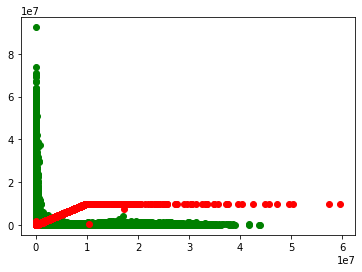

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'], nonfraud['amount'], c='g')
ax.scatter(fraud['oldbalanceOrg'], fraud['amount'], c='r')
plt.show()

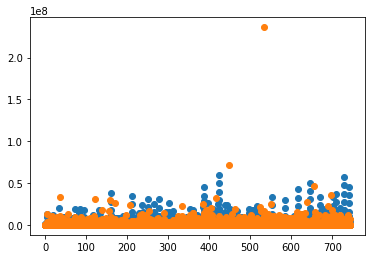

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

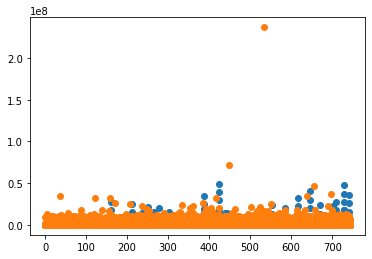

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

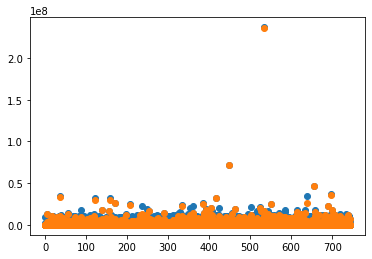

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

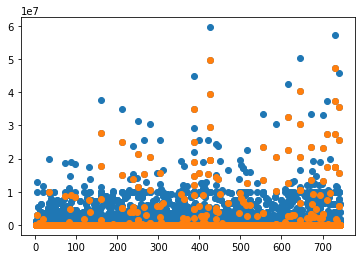

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np 
import pickle
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
dataset_fraud = pd.read_csv('/content/drive/MyDrive/PROJECTS/Fraud Detection ML/data cleaning.csv')

In [ ]:
dataset_fraud = dataset_fraud.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [ ]:
dataset_fraud.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [ ]:
dataset_fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
X = dataset_fraud.drop(['isFraud'], axis=1)
y = dataset_fraud[['isFraud']]

# Machine Learning Model

The Machine Learning Algorithms used below are Random Forest Classifier, K-Nearest Neighbors, and Logistic Regression.

## Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [ ]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [ ]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.7686434696161621


In [56]:
y_pred=clf.predict(test_X)

In [57]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.9996919508001421


## K- Nearest Neighbours (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(train_X, train_y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [52]:
pred = KNN.predict(test_X)
print(metrics.accuracy_score(test_y,pred))

0.9992715265095197


Classification Report : The clasification report displays the accuracy, precision, recall, F1, and support scores for the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("CONFUSION MATRIX")
print(confusion_matrix(test_y, pred))

CONFUSION MATRIX
[[1270361     475]
 [    452    1236]]


In [ ]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270836
           1       0.72      0.73      0.73      1688

    accuracy                           1.00   1272524
   macro avg       0.86      0.87      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression(max_iter=20, verbose = True)
reg.fit(train_X, train_y.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.9s finished


LogisticRegression(max_iter=20, verbose=True)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = reg.predict(test_X)
score = accuracy_score(predictions, test_y)
print(score)

0.9977847176163278


*Conclusion:*
For the detection of Fraud Analysis, 3 Algorithms were used, namely Random Forest Classifier, K-Nearest Neighbors, and Logistic regression. The accuracy achieved by using these algorithms are as follows:


*  **Random Forest Classifier**:  Accuracy =  0.9996919508001421 
*   **K-Nearest Neighbors**:  Accuracy = 0.9992715265095197
*   **Logistic Regression**:  Accuracy = 0.9977847176163278


